Building the Upstream using raw ACE and Wind Data and Comparing it to OMNI and Artemis and seeing if we are better than NASA.

Packages

In [1]:
import datetime

import pandas as pd
import pyspedas
#from pyqtgraph.graphicsItems.PlotDataItem import dataType
from pyspedas import tplot
import matplotlib.pyplot as plt
from pytplot import get_data
#import pandas as pd
import numpy as np


03-Nov-25 14:43:12: C:\Users\Brian\anaconda3\envs\Research_Espen\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(



Importing Data (ACE, Wind, OMNI)

In [2]:
def get_omni(start, end):
    return pyspedas.projects.omni.data(trange=[start, end], datatype='1min', level='hro2', time_clip=True)

def get_ace(start, end):
    return pyspedas.projects.ace.mfi(trange=[start, end], datatype='h3', time_clip=True)

def get_wind(start, end):
    return pyspedas.projects.wind.mfi(trange=[start, end], datatype='h0', time_clip=True)

def get_art(start, end):
    return pyspedas.projects.themis.fgm(trange=[start,end],probe=['b','c'],level="l2",time_clip=True)


In [3]:
pyspedas.projects.omni.data(trange=["2024-09-27/00:00:00", "2024-09-28/23:59:59"], datatype='1min', level='hro2', time_clip=True)

03-Nov-25 14:43:13: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2024/
03-Nov-25 14:43:17: File is current: omni_data/hro2_1min/2024/omni_hro2_1min_20240901_v01.cdf


['IMF',
 'PLS',
 'IMF_PTS',
 'PLS_PTS',
 'percent_interp',
 'Timeshift',
 'RMS_Timeshift',
 'RMS_phase',
 'Time_btwn_obs',
 'F',
 'BX_GSE',
 'BY_GSE',
 'BZ_GSE',
 'BY_GSM',
 'BZ_GSM',
 'RMS_SD_B',
 'RMS_SD_fld_vec',
 'flow_speed',
 'Vx',
 'Vy',
 'Vz',
 'proton_density',
 'T',
 'NaNp_Ratio',
 'Pressure',
 'E',
 'Beta',
 'Mach_num',
 'Mgs_mach_num',
 'x',
 'y',
 'z',
 'BSN_x',
 'BSN_y',
 'BSN_z',
 'AE_INDEX',
 'AL_INDEX',
 'AU_INDEX',
 'SYM_D',
 'SYM_H',
 'ASY_D',
 'ASY_H']

In [4]:

get_omni("2024-09-27/00:00:00", "2024-09-28/23:59:59")
get_ace("2024-09-26/22:00:00", "2024-09-28/23:59:59")
get_wind("2024-09-26/22:00:00", "2024-09-28/23:59:59")
get_art("2024-09-27/00:00:00","2024-09-28/23:59:59")

03-Nov-25 14:43:20: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2024/
03-Nov-25 14:43:25: File is current: omni_data/hro2_1min/2024/omni_hro2_1min_20240901_v01.cdf
03-Nov-25 14:43:28: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h3/2024/
03-Nov-25 14:43:30: File is current: ace_data/mag/level_2_cdaweb/mfi_h3/2024/ac_h3_mfi_20240926_v03.cdf
03-Nov-25 14:43:31: File is current: ace_data/mag/level_2_cdaweb/mfi_h3/2024/ac_h3_mfi_20240927_v03.cdf
03-Nov-25 14:43:34: File is current: ace_data/mag/level_2_cdaweb/mfi_h3/2024/ac_h3_mfi_20240928_v03.cdf
03-Nov-25 14:43:49: File is current: wind_data/wind_masters/wi_h0_mfi_00000000_v01.cdf
03-Nov-25 14:43:49: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h0/2024/
03-Nov-25 14:43:51: File is current: wind_data/mfi/mfi_h0/2024/wi_h0_mfi_20240926_v05.cdf
03-Nov-25 14:43:53: File is current: wind_data/mfi/mfi_h0/2024/wi_h0_mfi_2024092

['thb_fgs_btotal',
 'thb_fgs_gse',
 'thb_fgs_gsm',
 'thb_fgs_dsl',
 'thb_fgl_btotal',
 'thb_fgl_gse',
 'thb_fgl_gsm',
 'thb_fgl_dsl',
 'thb_fgl_ssl',
 'thb_fgh_btotal',
 'thb_fgh_gse',
 'thb_fgh_gsm',
 'thb_fgh_dsl',
 'thb_fgh_ssl',
 'thc_fgs_btotal',
 'thc_fgs_gse',
 'thc_fgs_gsm',
 'thc_fgs_dsl',
 'thc_fgl_btotal',
 'thc_fgl_gse',
 'thc_fgl_gsm',
 'thc_fgl_dsl',
 'thc_fgl_ssl',
 'thc_fgh_btotal',
 'thc_fgh_gse',
 'thc_fgh_gsm',
 'thc_fgh_dsl',
 'thc_fgh_ssl']

Interpolating Omni data to 1 minute, and Ace and Wind data to 1 second

In [5]:
#def interp(frame,sample):
    #frame['Time'] = pd.to_datetime(frame['Time'], unit='s')
    #frame = frame.set_index('Time')
    #frame = frame.resample(sample).mean().interpolate(method='linear').ffill().bfill()
    #frame = frame.reset_index()

In [6]:
omni = pd.DataFrame({'Time': get_data('BZ_GSM')[0], 'BZ': get_data('BZ_GSM')[1],'IMF': get_data('IMF')[1], "ts": get_data('Timeshift')[1], 'VZ': get_data('Vz')[1], 'Density': get_data('proton_density')[1], 'Temp': get_data('T')[1]})
omni['Time'] = pd.to_datetime(omni['Time'], unit='s')
omni = omni.set_index('Time')
omni = omni.resample('min').mean().interpolate(method='linear').ffill().bfill()
omni = omni.reset_index()

ace = pd.DataFrame({'Time': get_data('BGSM')[0], 'BZ': get_data('BGSM')[1][:,2]}, columns = ['Time', 'BZ']).replace(to_replace=[999.999, 9999.99, 99999.9, 9999999], value=np.nan)
ace['Time'] = pd.to_datetime(ace['Time'], unit='s')
ace = ace.set_index('Time')
ace = ace.resample('s').mean().interpolate(method='linear').ffill().bfill()
ace = ace.reset_index()

wind = pd.DataFrame({'Time': get_data('B3GSM')[0], 'BZ': get_data('B3GSM')[1][:,2]}, columns = ['Time', 'BZ']).replace(to_replace=[999.999, 9999.99, 99999.9, 9999999], value=np.nan)
wind['Time'] = pd.to_datetime(wind['Time'], unit='s')
wind = wind.set_index('Time')
wind = wind.resample('s').mean().interpolate(method='linear').ffill().bfill()
wind = wind.reset_index()


In [7]:
pyspedas.projects.ace.swe(trange=["2024-09-26/22:00:00", "2024-09-28/23:59:59"],datatype='h0', time_clip=True)

03-Nov-25 14:44:30: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/swepam/level_2_cdaweb/swe_h0/2024/
03-Nov-25 14:44:31: No links matching pattern ac_h0_swe_20240926_v??.cdf found at remote index https://spdf.gsfc.nasa.gov/pub/data/ace/swepam/level_2_cdaweb/swe_h0/2024/
03-Nov-25 14:44:32: No links matching pattern ac_h0_swe_20240927_v??.cdf found at remote index https://spdf.gsfc.nasa.gov/pub/data/ace/swepam/level_2_cdaweb/swe_h0/2024/
03-Nov-25 14:44:33: No links matching pattern ac_h0_swe_20240928_v??.cdf found at remote index https://spdf.gsfc.nasa.gov/pub/data/ace/swepam/level_2_cdaweb/swe_h0/2024/


[]

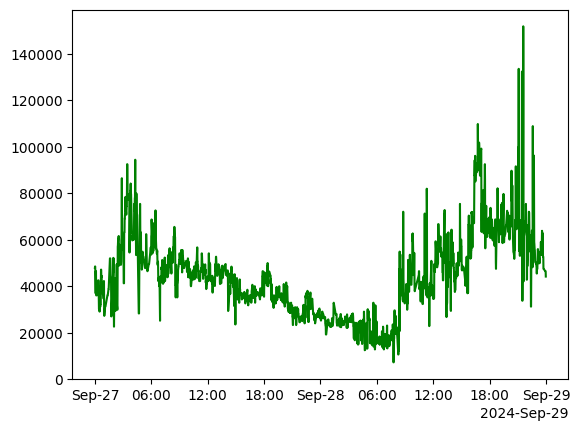

In [8]:
plt.plot(omni['Time'], omni['Temp'], label='Omni', color='green', linestyle='-')

export upstream solar wind series as csv file with time and bz as columns. pull out, vz, density, and temperatures


In [9]:
print(ace['Time'])
print(wind['Time'])

0        2024-09-26 22:00:30
1        2024-09-26 22:00:31
2        2024-09-26 22:00:32
3        2024-09-26 22:00:33
4        2024-09-26 22:00:34
                 ...        
179936   2024-09-28 23:59:26
179937   2024-09-28 23:59:27
179938   2024-09-28 23:59:28
179939   2024-09-28 23:59:29
179940   2024-09-28 23:59:30
Name: Time, Length: 179941, dtype: datetime64[ns]
0        2024-09-26 22:00:01
1        2024-09-26 22:00:02
2        2024-09-26 22:00:03
3        2024-09-26 22:00:04
4        2024-09-26 22:00:05
                 ...        
179993   2024-09-28 23:59:54
179994   2024-09-28 23:59:55
179995   2024-09-28 23:59:56
179996   2024-09-28 23:59:57
179997   2024-09-28 23:59:58
Name: Time, Length: 179998, dtype: datetime64[ns]


In [10]:
upstream = []
upstream_time = []
shift = []
for i in range(len(omni['IMF'])):
    delta = pd.Timedelta(omni['ts'][i], unit='s')
    time = omni['Time'][i] - delta
    shift.append(delta)
    if omni["IMF"][i] == 51 or 52:
        ind = ace.loc[ace['Time'] == omni['Time'].iloc[i]-delta].index[0]
        upstream.append(ace['BZ'][ind])
        upstream_time.append(time)
        #upstream_time.append(omni['Time'][i])
    elif omni["IMF"][i] == 71:
        ind = wind.loc[wind['Time'] == omni['Time'].iloc[i]-delta].index[0]
        upstream.append(wind['BZ'][ind])
        upstream_time.append(time)
        #upstream_time.append(omni['Time'][i])
    else:
        upstream.append(np.nan)
        upstream_time.append(time)
        #upstream_time.append(omni['Time'][i])


upstream_wind = pd.DataFrame({'Time': upstream_time, 'BZ': upstream})
upstream_wind = upstream_wind.sort_values(by='Time')
upstream_wind = upstream_wind.set_index('Time')
#upstream_wind = upstream_wind.resample('min').mean().ffill().interpolate(method='linear').bfill()
upstream_wind = upstream_wind.reset_index()

avg_ts = pd.to_timedelta(pd.Series(shift)).mean()


In [11]:
print(len(upstream_wind))

2880


create a upstream series( pandas dataframe to get time/ data and SCID), and then sort it out

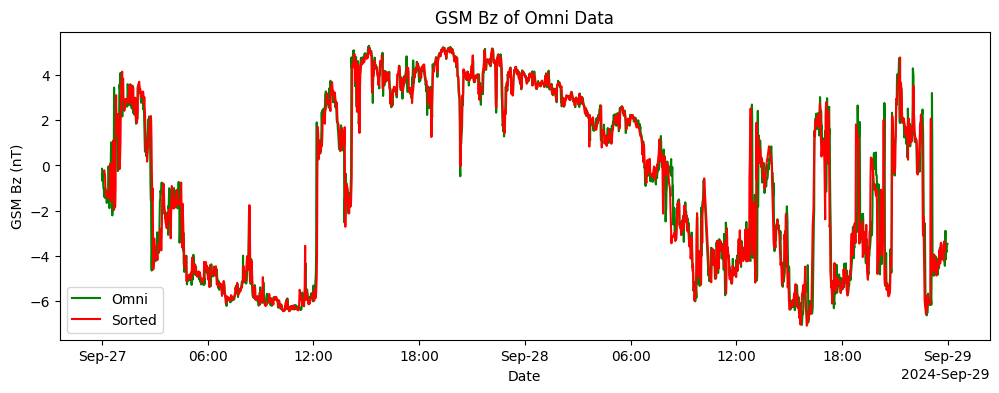

In [12]:
fig, ax = plt.subplots(figsize = (12,4))
#plt.plot(upstream_time, upstream, label='Upstream', color='blue', linestyle='-')
plt.plot(omni['Time'], omni['BZ'], label='Omni', color='green', linestyle='-')
plt.plot(upstream_wind['Time']+pd.Timedelta(minutes=56), upstream_wind['BZ'], label='Sorted', color='red', linestyle='-')
plt.xlabel('Date')
plt.ylabel('GSM Bz (nT)')
plt.title('GSM Bz of Omni Data')
plt.legend()
plt.show()

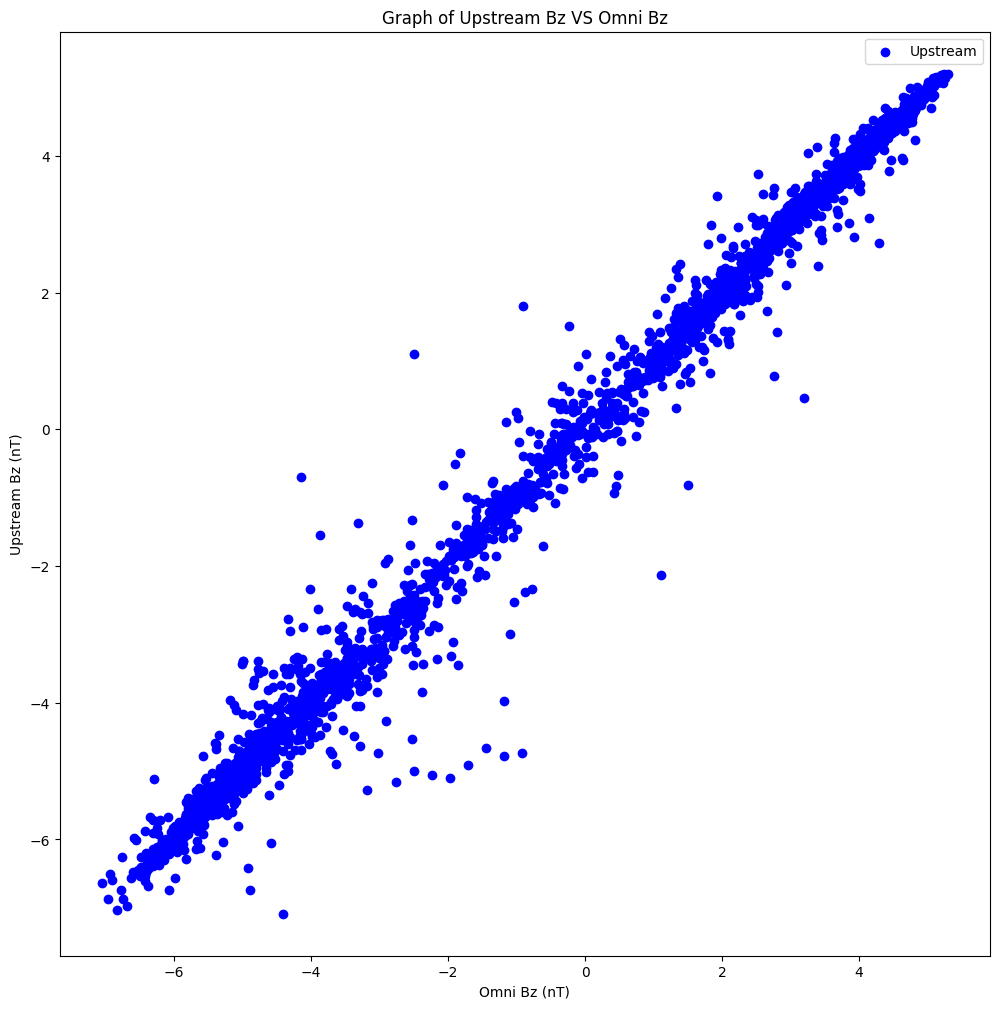

In [13]:
fig, ax = plt.subplots(figsize = (12,12))
plt.scatter(omni['BZ'], upstream_wind['BZ'], label='Upstream', color='blue')

plt.xlabel('Omni Bz (nT)')
plt.ylabel('Upstream Bz (nT)')
plt.title('Graph of Upstream Bz VS Omni Bz')
plt.legend()
plt.show()

In [14]:
#fig, ax = plt.subplots(figsize = (12,4))
#plt.plot(b[0], b[1][:,2], label='Upstream', color='blue', linestyle='-')
#plt.plot(c[0], c[1][:,2], label='Omni', color='red', linestyle='-')

#plt.xlabel('Date')
#plt.ylabel('GSM Bz (nT)')
#plt.title('GSM Bz of Omni Data')
#plt.legend()
#plt.show()

In [15]:
upstream_wind.to_csv('upstream_output.csv', index=False)